In [1]:
import pickle
OFMfeaturized=pickle.load(open('/globalscratch/users/r/g/rgouvea/autoencode_OFM/OFM_93k_mp_gap.pkl','rb'))
OFMfeaturized=OFMfeaturized.drop('structure',axis=1)
Xtoencode=OFMfeaturized.fillna(0)
Xtoencode

,OFM: s^1 - s^1,OFM: s^1 - s^2,OFM: s^1 - p^1,OFM: s^1 - p^2,OFM: s^1 - p^3,OFM: s^1 - p^4,OFM: s^1 - p^5,OFM: s^1 - p^6,OFM: s^1 - d^1,OFM: s^1 - d^2,...,OFM: f^14 - f^5,OFM: f^14 - f^6,OFM: f^14 - f^7,OFM: f^14 - f^8,OFM: f^14 - f^9,OFM: f^14 - f^10,OFM: f^14 - f^11,OFM: f^14 - f^12,OFM: f^14 - f^13,OFM: f^14 - f^14
id,,,,,,,,,,,,,,,,,,,,,
id40482,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
id40486,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
id40487,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000022
id40490,0.000000,0.080160,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
id40496,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id83741,0.174544,0.746256,0.373128,0.000000,0.0,0.0,0.000000,0.0,0.373128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
id83742,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.815492
id83743,0.007311,0.241355,0.000000,0.000000,0.0,0.0,0.238758,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [18]:
# use kmeans to cluster the data of the dataframe and get the labels, lets use k=24
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12, random_state=0).fit(Xtoencode)
# get the labels
labels=kmeans.labels_
# add the labels to the dataframe
Xtoencode['labels']=labels
Xtoencode['labels'], type(Xtoencode['labels'])

(id
 id40482    3
 id40486    1
 id40487    0
 id40490    1
 id40496    9
           ..
 id83741    5
 id83742    9
 id83743    6
 id83744    9
 id83745    8
 Name: labels, Length: 93419, dtype: int32,
 pandas.core.series.Series)

In [12]:
Xtoencode['labels']

id
id40482    0
id40486    7
id40487    0
id40490    7
id40496    4
          ..
id83741    1
id83742    4
id83743    6
id83744    4
id83745    2
Name: labels, Length: 93419, dtype: int32

In [4]:
import pickle
import hypertools as hyp
import numpy as np
OFMregAE='/globalscratch/users/r/g/rgouvea/autoencode_OFM/MEGNetModel_OFMencoded/fullOFM2.5f_0.2compress.pkl'
encoded_data=pickle.load(open(OFMregAE,'rb'))
encoded_data

2023-02-14 15:01:34.362279: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,OFMencoded2.5f_20p|0,OFMencoded2.5f_20p|1,OFMencoded2.5f_20p|2,OFMencoded2.5f_20p|3,OFMencoded2.5f_20p|4,OFMencoded2.5f_20p|5,OFMencoded2.5f_20p|6,OFMencoded2.5f_20p|7,OFMencoded2.5f_20p|8,OFMencoded2.5f_20p|9,...,OFMencoded2.5f_20p|178,OFMencoded2.5f_20p|179,OFMencoded2.5f_20p|180,OFMencoded2.5f_20p|181,OFMencoded2.5f_20p|182,OFMencoded2.5f_20p|183,OFMencoded2.5f_20p|184,OFMencoded2.5f_20p|185,OFMencoded2.5f_20p|186,OFMencoded2.5f_20p|187
id,,,,,,,,,,,,,,,,,,,,,
id40482,2.457439,-1.653732,-0.454693,0.445528,0.816780,-1.158594,1.404513,1.851679,0.327644,3.041272,...,-0.115566,1.681456,-1.345079,2.669356,12.461072,-0.925237,-1.807668,2.444738,-0.553613,6.051751
id40486,7.408349,-1.770148,-0.432732,-0.661920,1.070813,-1.119629,3.919230,0.391148,-4.078171,0.064455,...,0.291521,-2.614008,4.594350,1.040972,7.606750,-0.278805,-1.191540,1.045777,-1.723718,-2.199276
id40487,1.889742,-2.056637,0.044159,-0.268646,1.862827,-1.632249,2.749366,0.009215,1.268889,2.230861,...,0.086166,-4.151545,-4.799313,2.354464,10.004939,-0.031734,-2.322889,0.623748,-1.915632,5.271832
id40490,10.254455,-0.315069,0.029824,0.158774,3.864119,-0.859002,0.466111,8.759697,-3.484463,-0.675194,...,0.473650,-6.168602,3.776003,1.417779,4.157994,-0.344226,-0.794457,1.308876,-0.506539,2.222718
id40496,6.392503,-0.557067,0.383040,0.154646,4.610425,-0.544881,0.796945,4.128116,-3.483348,-1.271791,...,0.215158,-5.745655,5.423445,1.294232,4.905068,-0.354035,-0.882005,1.957555,-0.770640,-4.246772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id83741,17.947809,117.760490,99.893898,104.921738,6.189988,103.652100,5.543431,-1.793506,-8.870541,1.921261,...,122.648804,-24.277752,-8.085606,73.293251,11.910750,0.089904,100.241287,135.732361,78.080765,14.048782
id83742,6.127391,-0.600592,0.925639,-0.165723,11.704003,-1.969001,-5.424056,10.459679,-6.755463,2.630917,...,2.188721,-4.539633,-6.722208,4.320560,25.103409,0.187210,-1.026044,1.324995,-1.317702,-6.196714
id83743,0.815810,-1.221939,-0.156937,-0.055347,1.735470,-0.449592,0.629594,0.288842,1.713156,1.178090,...,-0.430948,0.862097,2.939908,1.465321,6.953952,-0.175718,-1.857089,1.720562,-1.566043,-0.221662


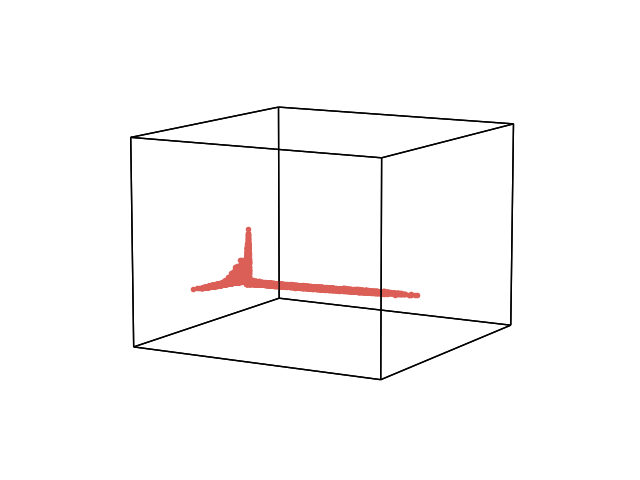

In [5]:
%matplotlib ipympl
geo = hyp.plot(encoded_data, '.') # if the number of features is greater than 3, the default is to plot in 3d

/home/ucl/modl/rgouvea/anaconda3/envs/env_modnetmod/lib/python3.8/site-packages/hypertools/plot/plot.py:249: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '
/home/ucl/modl/rgouvea/anaconda3/envs/env_modnetmod/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/ucl/modl/rgouvea/anaconda3/envs/env_modnetmod/lib/python3.8/site-packages/hypertools/plot/plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


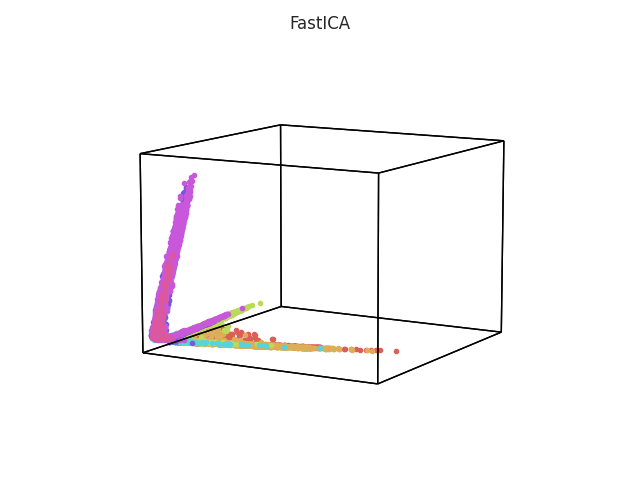

In [22]:
%matplotlib ipympl
geo = hyp.plot(encoded_data, '.', group=Xtoencode['labels'],
                reduce='FastICA', title='FastICA',ndims=3)

# you can also recover the cluster labels using the cluster tool
# cluster_labels = hyp.cluster(encoded_data, n_clusters=23) 

# hyp.plot(encoded_data, 'o', point_colors=Xtoencode['labels'], ndims=2)

In [7]:
import pickle
OFMfeaturized=pickle.load(open('/globalscratch/users/r/g/rgouvea/autoencode_OFM/OFM_93k_mp_gap.pkl','rb'))
OFMfeaturized=OFMfeaturized.drop('structure',axis=1)
Xtoencode=OFMfeaturized.fillna(-1)
print(Xtoencode)

         OFM: s^1 - s^1  OFM: s^1 - s^2  OFM: s^1 - p^1  OFM: s^1 - p^2  \
id                                                                        
id40482        0.000000        0.000000        0.000000        0.000000   
id40486        0.000000        0.000000        0.000000        0.000000   
id40487        0.000000        0.000000        0.000000        0.000000   
id40490        0.000000        0.080160        0.000000        0.000000   
id40496        0.000000        0.000000        0.000000        0.000000   
...                 ...             ...             ...             ...   
id83741        0.174544        0.746256        0.373128        0.000000   
id83742        0.000000        0.000000        0.000000        0.000000   
id83743        0.007311        0.241355        0.000000        0.000000   
id83744        0.000000        0.000000        0.000000        0.000000   
id83745        0.000000        0.203940        0.000000        0.131181   

         OFM: s^1 - p^3 

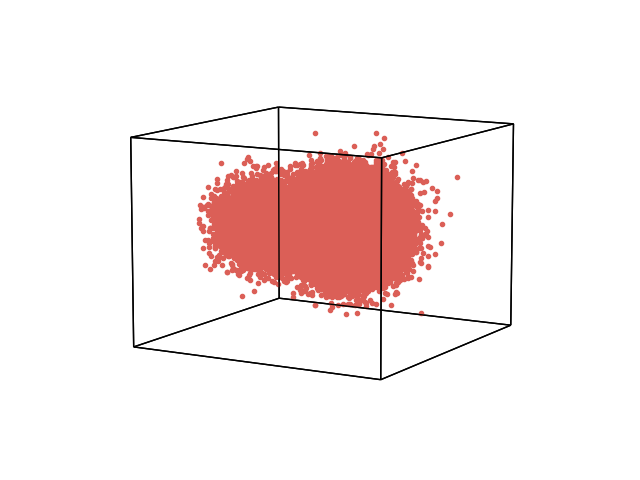

In [9]:
import pickle
VAE_OFM='/globalscratch/users/r/g/rgouvea/GeneticAlgorithmTest/GeneticVAE_OFMmpgap/cr_0.2/VAE_OFM2.1p_0.2compress.pkl'
encodedVAE_data=pickle.load(open(VAE_OFM,'rb'))
import hypertools as hyp
import numpy as np
%matplotlib ipympl
geo = hyp.plot(encodedVAE_data, '.') # if the number of features is greater than 3, the default is to plot in 3d


/home/ucl/modl/rgouvea/anaconda3/envs/env_modnetmod/lib/python3.8/site-packages/hypertools/plot/plot.py:249: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '
/home/ucl/modl/rgouvea/anaconda3/envs/env_modnetmod/lib/python3.8/site-packages/hypertools/plot/plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


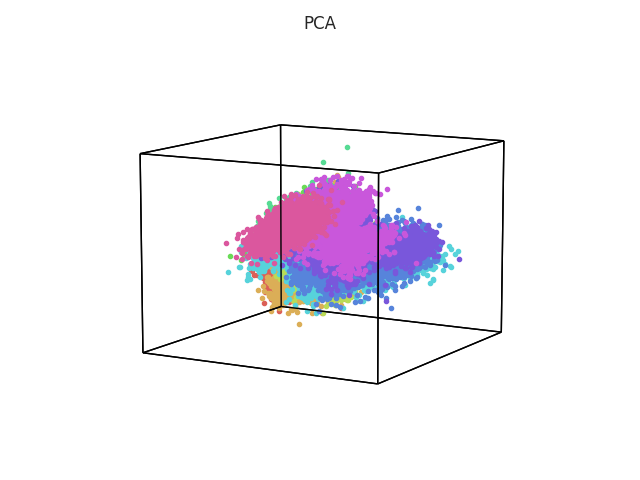

In [25]:
geo = hyp.plot(encodedVAE_data, '.', group=Xtoencode['labels'], reduce='FastICA', title='PCA',ndims=3)